# 케라스의 texts_to_matrix() 이해하기

### 다층 퍼셉트론(MLP)로 텍스트 분류를 수행하기 전, 사용할 도구인 케라스 Tokenizer의 texts_to_matrix() 이해해보기

**1) 케라스의 전처리 도구인 Tokenizer를 임포트**

In [1]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer

**2) 텍스트 데이터에 대해서 정수 인코딩을 수행**

In [2]:
texts = ['먹고 싶은 사과', '먹고 싶은 바나나', '길고 노란 바나나 바나나', '저는 과일이 좋아요']

In [3]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
print(tokenizer.word_index)

{'바나나': 1, '먹고': 2, '싶은': 3, '사과': 4, '길고': 5, '노란': 6, '저는': 7, '과일이': 8, '좋아요': 9}


**3) 텍스트 데이터에 texts_to_matrix()의 count 모드 사용**

In [4]:
print(tokenizer.texts_to_matrix(texts, mode = 'count'))

[[0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]]


**4) 텍스트 데이터에 texts_to_matrix()의 binary 모드 사용**

In [5]:
print(tokenizer.texts_to_matrix(texts, mode = 'binary'))

[[0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]]


**5) 텍스트 데이터에 texts_to_matrix()의 tfidf 모드 사용**

In [6]:
print(tokenizer.texts_to_matrix(texts, mode = 'tfidf').round(2))

[[0.   0.   0.85 0.85 1.1  0.   0.   0.   0.   0.  ]
 [0.   0.85 0.85 0.85 0.   0.   0.   0.   0.   0.  ]
 [0.   1.43 0.   0.   0.   1.1  1.1  0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   1.1  1.1  1.1 ]]


**6) 텍스트 데이터에 texts_to_matrix()의 freq 모드 사용**

In [7]:
print(tokenizer.texts_to_matrix(texts, mode = 'freq').round(2))

[[0.   0.   0.33 0.33 0.33 0.   0.   0.   0.   0.  ]
 [0.   0.33 0.33 0.33 0.   0.   0.   0.   0.   0.  ]
 [0.   0.5  0.   0.   0.   0.25 0.25 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.33 0.33 0.33]]


# 20개 뉴스 그룹 데이터에 대한 이해

### 사이킷런에서는 20개의 다른 주제를 가진 18846개의 뉴스 그룹 이메일 데이터를 제공하므로 이를 이용해 테스트 데이터에서 이메일 본문을 보고 20개의 주제 중 어떤 주제인지를 맞추도록 함

### 데이터 이해 과정

In [8]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

**1) subset의 값으로 all을 넣으면 전체 데이터인 18846개의 샘플을 다운로드할 수 있으며,**<br>
&nbsp;&nbsp;&nbsp;&nbsp; **train을 넣으면 훈련 데이터를, test를 넣으면 테스트 데이터를 다운로드할 수 있음**

In [9]:
newsdata = fetch_20newsgroups(subset = 'train')

**2) newsdata.keys()를 출력하면 해당 데이터의 속성을 확인할 수 있음**

In [10]:
print(newsdata.keys())

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])


**3) 훈련용 샘플의 개수를 확인**

In [11]:
print('훈련용 샘플의 개수 : {}'.format(len(newsdata.data)))

훈련용 샘플의 개수 : 11314


**4) target_names에는 20개의 주제의 이름을 담고 있으므로 어떤 주제가 있는지 확인**

In [12]:
print('총 주제의 개수 : {}'.format(len(newsdata.target_names)))
print(newsdata.target_names)

총 주제의 개수 : 20
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


**5) 첫 번째 샘플의 주제가 몇 번인지와 어떤 주제를 나타내는지 확인**

In [13]:
print('첫번째 샘플의 레이블 : {}'.format(newsdata.target[0]))

첫번째 샘플의 레이블 : 7


In [14]:
print('7번 레이블이 의미하는 주제 : {}'.format(newsdata.target_names[7]))

7번 레이블이 의미하는 주제 : rec.autos


**6) 첫 번째 샘플의 본문 내용을 확인**

In [15]:
print(newsdata.data[0]) # 첫번째 샘플 출력

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







**7) 훈련에 사용될 메일 본문인 data와 레이블인 target을 데이터프레임으로 만들어 데이터에 대한 상위 5개의 통계적 정보 확인**

In [16]:
data = pd.DataFrame(newsdata.data, columns = ['email'])
data['target'] = pd.Series(newsdata.target)
data[:5]

,email,target
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14


**8) news 열은 문자열, target 열은 정수형 데이터이므로 Null 값을 가진 샘플이 있는지 확인**

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11314 entries, 0 to 11313
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   11314 non-null  object
 1   target  11314 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 176.9+ KB


In [18]:
data.isnull().values.any()

False

**9) 샘플 중 중복을 제거한 개수도 확인**

In [19]:
print('중복을 제외한 샘플의 수 : {}'.format(data['email'].nunique()))
print('중복을 제외한 주제의 수 : {}'.format(data['target'].nunique()))

중복을 제외한 샘플의 수 : 11314
중복을 제외한 주제의 수 : 20


**10) 레이블 값의 분포를 시각화하여 확인**

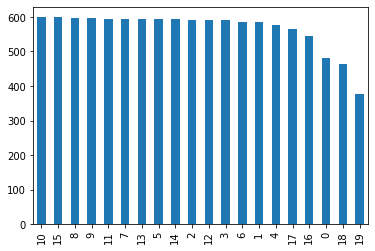

In [20]:
data['target'].value_counts().plot(kind='bar')

**11) 각 레이블이 몇 개 있는지 구체적인 수치로 확인**

In [21]:
print(data.groupby('target').size().reset_index(name='count'))

    target  count
0        0    480
1        1    584
2        2    591
3        3    590
4        4    578
5        5    593
6        6    585
7        7    594
8        8    598
9        9    597
10      10    600
11      11    595
12      12    591
13      13    594
14      14    593
15      15    599
16      16    546
17      17    564
18      18    465
19      19    377


### 데이터 전처리 과정

**1) 데이터프레임으로부터 다시 메일 본문과 레이블을 분리하고, 테스트 데이터 또한 불러오기**

In [22]:
newsdata_test = fetch_20newsgroups(subset='test', shuffle=True)
train_email = data['email']
train_label = data['target']

**2) 훈련 데이터와 테스트 데이터의 본문과 레이블을 각각 저장**

In [23]:
test_email = newsdata_test.data
test_label = newsdata_test.target

**3) 필요한 변수들을 정의**

In [24]:
max_words = 10000
num_classes = 20

**4) 케라스 토크나이저로 전처리를 수행하는 함수인 prepare_data 생성**

In [25]:
def prepare_data(train_data, test_data, mode): # 전처리 함수
    tokenizer = Tokenizer(num_words = max_words) # max_words 개수만큼의 단어만 사용한다.
    tokenizer.fit_on_texts(train_data)
    X_train = tokenizer.texts_to_matrix(train_data, mode=mode) # 샘플 수 × max_words 크기의 행렬 생성
    X_test = tokenizer.texts_to_matrix(test_data, mode=mode) # 샘플 수 × max_words 크기의 행렬 생성
    return X_train, X_test, tokenizer.index_word

**5) prepare_data 함수로 메일 본문은 'binary' 모드로 변환하고, 훈련 데이터와 테스트 데이터의 레이블은 원-핫 인코딩을 수행**

In [26]:
X_train, X_test, index_to_word = prepare_data(train_email, test_email, 'binary') # binary 모드로 변환
y_train = to_categorical(train_label, num_classes) # 원-핫 인코딩
y_test = to_categorical(test_label, num_classes) # 원-핫 인코딩

In [27]:
print('훈련 샘플 본문의 크기 : {}'.format(X_train.shape))
print('훈련 샘플 레이블의 크기 : {}'.format(y_train.shape))
print('테스트 샘플 본문의 크기 : {}'.format(X_test.shape))
print('테스트 샘플 레이블의 크기 : {}'.format(y_test.shape))

훈련 샘플 본문의 크기 : (11314, 10000)
훈련 샘플 레이블의 크기 : (11314, 20)
테스트 샘플 본문의 크기 : (7532, 10000)
테스트 샘플 레이블의 크기 : (7532, 20)


**6) 빈도수 상위 1번 단어와 9999번 단어를 확인**

In [28]:
print('빈도수 상위 1번 단어 : {}'.format(index_to_word[1]))
print('빈도수 상위 9999번 단어 : {}'.format(index_to_word[9999]))

빈도수 상위 1번 단어 : the
빈도수 상위 9999번 단어 : mic


# 다층 퍼셉트론을 사용하여 텍스트 분류하기

**1) 모델 설계에 필요한 도구들을 임포트**

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

**2) 다층 퍼셉트론을 설계하기 위해 fit_and_evaluate라는 함수 내에 정의**

In [30]:
def fit_and_evaluate(X_train, y_train, X_test, y_test):
    model = Sequential()
    model.add(Dense(256, input_shape=(max_words,), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(X_train, y_train, batch_size=128, epochs=5, verbose=1, validation_split=0.1)
    score = model.evaluate(X_test, y_test, batch_size=128, verbose=0)
    return score[1]

**3) texts_to_matrix()의 4개의 모드에 대해서 전부 모델을 훈련하고 결과를 확인**

In [31]:
modes = ['binary', 'count', 'tfidf', 'freq'] # 4개의 모드를 리스트에 저장.

for mode in modes: # 4개의 모드에 대해서 각각 아래의 작업을 반복한다.
    X_train, X_test, _ = prepare_data(train_email, test_email, mode) # 모드에 따라서 데이터를 전처리
    score = fit_and_evaluate(X_train, y_train, X_test, y_test) # 모델을 훈련하고 평가.
    print(mode+' 모드의 테스트 정확도:', score)

Epoch 1/5
80/80 [==============================] - 4s 36ms/step - loss: 2.2848 - accuracy: 0.3316 - val_loss: 0.9677 - val_accuracy: 0.8154
Epoch 2/5
80/80 [==============================] - 3s 35ms/step - loss: 0.8853 - accuracy: 0.7569 - val_loss: 0.4557 - val_accuracy: 0.8905
Epoch 3/5
80/80 [==============================] - 3s 34ms/step - loss: 0.4347 - accuracy: 0.8837 - val_loss: 0.3520 - val_accuracy: 0.9037
Epoch 4/5
80/80 [==============================] - 3s 34ms/step - loss: 0.2696 - accuracy: 0.9339 - val_loss: 0.3077 - val_accuracy: 0.9072
Epoch 5/5
80/80 [==============================] - 3s 35ms/step - loss: 0.1745 - accuracy: 0.9588 - val_loss: 0.2917 - val_accuracy: 0.9125
binary 모드의 테스트 정확도: 0.8296601176261902
Epoch 1/5
80/80 [==============================] - 3s 35ms/step - loss: 2.7383 - accuracy: 0.2564 - val_loss: 1.5083 - val_accuracy: 0.7279
Epoch 2/5
80/80 [==============================] - 3s 34ms/step - loss: 1.4151 - accuracy: 0.6369 - val_loss: 0.7175 - va